# Reguły asocjacyjne - Klasteryzacja - Algorytm K-średnich
### Eksploracja Danych, Informatyka, st.I, sem.V
Piotr Dyba

Aleksandra Kilijańska

Magdalena Góras


Algorytm K-średnich to metoda nienadzorowanego uczenia maszynowego, która polega na grupowaniu danych w k grup (klastrów) na podstawie ich podobieństwa.

Istotą metody k-średnich jest ustalenie na samym początku procesu grupowania docelowej liczby skupień k.
Proces wygląda w następujący sposób:
* Na początku dzielimy wszystkie obiekty na k początkowych skupień - na tym etapie wybiera się tzw. wstępne centra skupień (centroidy), czyli punkty, które będą decydować o pierwszej przynależności obiektów (w praktyce stosuje się rożne metody wyznaczania takich centrów).
* Mając wybrane wstępne centra skupień, obliczamy odlegaości każdego z obiektów od każdego z centrów i przyporządkowujemy obiekt do tego skupienia, do którego centrum jest mu "najbliżej".
* W kolejnym etapie wyznaczamy już rzeczywiste centra utworzonych skupień i odlegaości każdego z obiektów od nich - I tu zdarzyć się może, że obiekt znajduje się w skupieniu, którego centrum jest od niego bardziej odlegae niż centrum innego skupienia.
 -> W takiej sytuacji dokonujemy odpowiedniego przeniesienia obiektu (lub obiektów, gdy jest ich więcej).
* Następnie ponownie wyznaczamy nowe centra skupień i powtarzamy całą proceduę.
* W pewnym momencie obiekty przestaną już być przenoszone, ponieważ znajdą się w skupieniach, do których jest im "najbliżej". W tym momencie proces grupowania się kończy.

Celem jest, aby punkty w klastrach były jak najbardziej do siebie podobne, a klastry jak najmniej podobne do siebie.


### Import bibliotek

In [92]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Import danych

In [93]:
df = pd.read_csv('PCA_data.csv',sep=';',header=None)
df = df.astype({0:'float',1:'float',2:'float'})
df = df.rename(columns={0: 'Czynnik_1',1:'Czynnik_2',2:'Czynnik_3'})
df = df.drop(labels = 3,axis = 1)
df.head()

,Czynnik_1,Czynnik_2,Czynnik_3
0,1.118243,0.117249,0.078676
1,0.075446,0.438464,0.017472
2,0.435048,0.035697,0.018986
3,0.671363,3.260510,0.651793
4,0.204924,0.117188,0.120459


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Czynnik_1  569 non-null    float64
 1   Czynnik_2  569 non-null    float64
 2   Czynnik_3  569 non-null    float64
dtypes: float64(3)
memory usage: 13.5 KB


### Tworzenie modelu

In [95]:
X = df[['Czynnik_1', 'Czynnik_2', 'Czynnik_3']]
X = X.values

In [96]:
k_means = KMeans(n_clusters = 2,max_iter=600, algorithm = 'auto')
k_means.fit(X)

c:\Users\Piotrek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Piotrek\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='auto', max_iter=600, n_clusters=2)

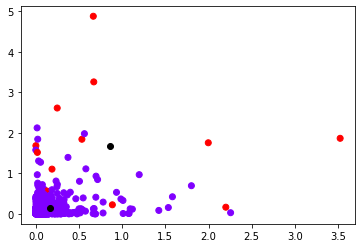

In [98]:
labels = k_means.labels_
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], color='black')
plt.show()

![](nojigit.jpeg)